# Part 1.

## Data loading, pre-processing and representation.

In [2]:
#adding libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [ ]:
#accessing the dataset file stored in the Google drive
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
!ls

In [3]:
df = pd.read_csv("Student_performance_data.csv")#Reading the dataset file
print(df.dtypes)#Representing datatypes of the dataset columns

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass             int64
dtype: object


In [4]:
print(df["Gender"].value_counts())
print(df["Volunteering"].value_counts())
print(df["GradeClass"].value_counts())
print(df["Age"].value_counts())


Gender
1    1222
0    1170
Name: count, dtype: int64
Volunteering
0    2016
1     376
Name: count, dtype: int64
GradeClass
4    1211
3     414
2     391
1     269
0     107
Name: count, dtype: int64
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64


In [5]:
# Convert the 'Gender' column to numeric codes (e.g., Male=1, Female=0) for use in machine learning models
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Volunteering"] = df["Volunteering"].astype("category").cat.codes

reduced_df = df[["GPA", "Age", "Volunteering", "Gender", "GradeClass","Age", "StudyTimeWeekly", "Absences"]]

# #Dataset data are displayed
print(reduced_df.describe())
print(reduced_df.info())
#Representing datatypes of the dataset columns
print(reduced_df.dtypes)

               GPA          Age  Volunteering       Gender   GradeClass  \
count  2392.000000  2392.000000   2392.000000  2392.000000  2392.000000   
mean      1.906186    16.468645      0.157191     0.510870     2.983696   
std       0.915156     1.123798      0.364057     0.499986     1.233908   
min       0.000000    15.000000      0.000000     0.000000     0.000000   
25%       1.174803    15.000000      0.000000     0.000000     2.000000   
50%       1.893393    16.000000      0.000000     1.000000     4.000000   
75%       2.622216    17.000000      0.000000     1.000000     4.000000   
max       4.000000    18.000000      1.000000     1.000000     4.000000   

               Age  StudyTimeWeekly     Absences  
count  2392.000000      2392.000000  2392.000000  
mean     16.468645         9.771992    14.541388  
std       1.123798         5.652774     8.467417  
min      15.000000         0.001057     0.000000  
25%      15.000000         5.043079     7.000000  
50%      16.000000

In [36]:
print(df.describe())

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000     0.489548     0.510870     0.877508           1.746237   
std     690.655244     0.374599     0.499986     1.028476           1.000411   
min    1001.000000     0.000000     0.000000     0.000000           0.000000   
25%    1598.750000     0.000000     0.000000     0.000000           1.000000   
50%    2196.500000     0.333333     1.000000     0.000000           2.000000   
75%    2794.250000     0.666667     1.000000     2.000000           2.000000   
max    3392.000000     1.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          0.489108     0.501427     0.301421         2.122074   
std           0.282964     0.291980     0.458971         1.122813   
min

 ### DATA NORMALIZATION


In [6]:
df["GPA"] = (df["GPA"] - df["GPA"].min()) / (df["GPA"].max() - df["GPA"].min())
df["StudyTimeWeekly"] = (df["StudyTimeWeekly"] - df["StudyTimeWeekly"].min()) / (df["StudyTimeWeekly"].max() - df["StudyTimeWeekly"].min())
df["Absences"] = (df["Absences"] - df["Absences"].min()) / (df["Absences"].max() - df["Absences"].min())
df["Age"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())

print(df.head(10))
print(df.describe())


   StudentID       Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001  0.666667       1          0                  2         0.992773   
1       1002  1.000000       0          0                  1         0.771270   
2       1003  0.000000       0          2                  3         0.210718   
3       1004  0.666667       1          0                  3         0.501965   
4       1005  0.666667       1          0                  2         0.233840   
5       1006  1.000000       0          0                  1         0.409979   
6       1007  0.000000       0          1                  1         0.780928   
7       1008  0.000000       1          1                  4         0.772058   
8       1009  0.666667       0          0                  0         0.228310   
9       1010  0.333333       1          0                  1         0.923230   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0  0.241379         1             

### DATA VISUALISATION

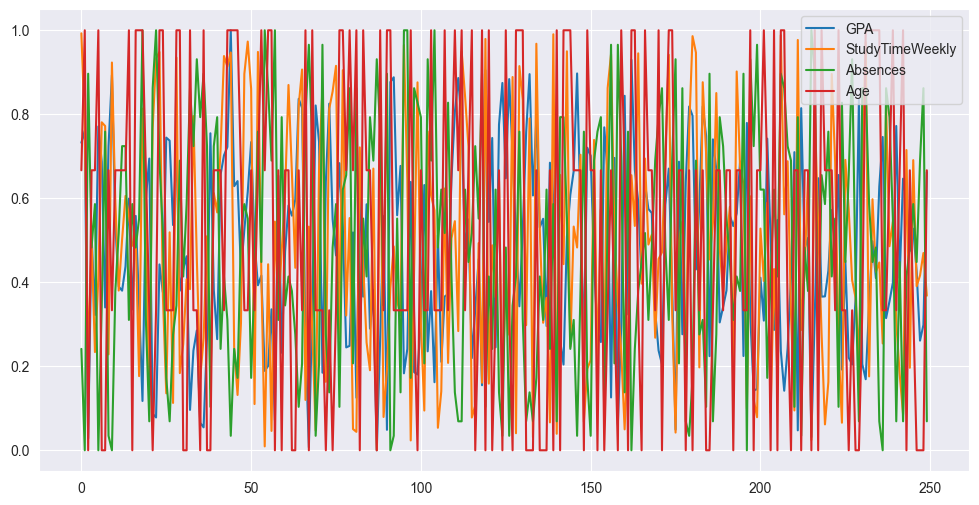

In [7]:


# Select numeric features
data_for_visualisation = df[["GPA",  "StudyTimeWeekly", "Absences", "Age"]]

# Limit data to first 300 rows for clarity (optional)
data_for_visualisation = data_for_visualisation.head(250)

# Line plot
data_for_visualisation.plot(figsize=(12, 6))
plt.show()


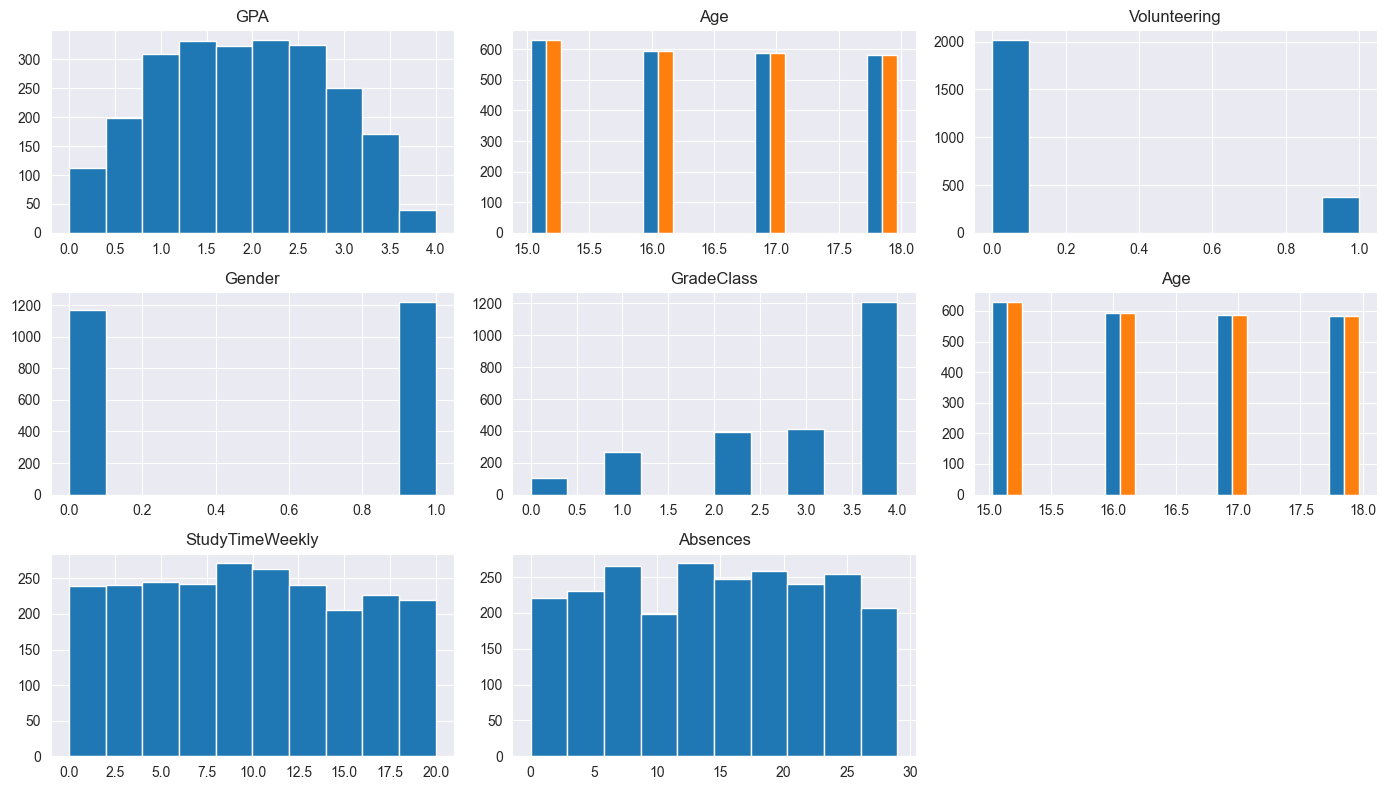

In [8]:
#Displaying histograms
reduced_df.hist(figsize=(14,8))
plt.tight_layout()
plt.show()

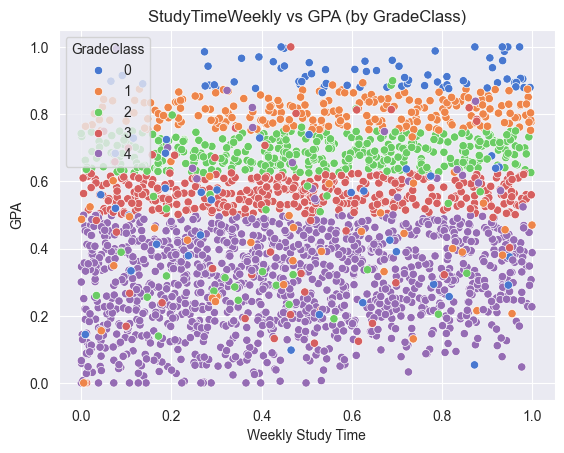

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="StudyTimeWeekly", y="GPA", hue="GradeClass", palette="muted")
plt.title("StudyTimeWeekly vs GPA (by GradeClass)")
plt.xlabel("Weekly Study Time")
plt.ylabel("GPA")
plt.show()

Text(0.5, 0.98, 'Feature Pairplot by GradeClass')

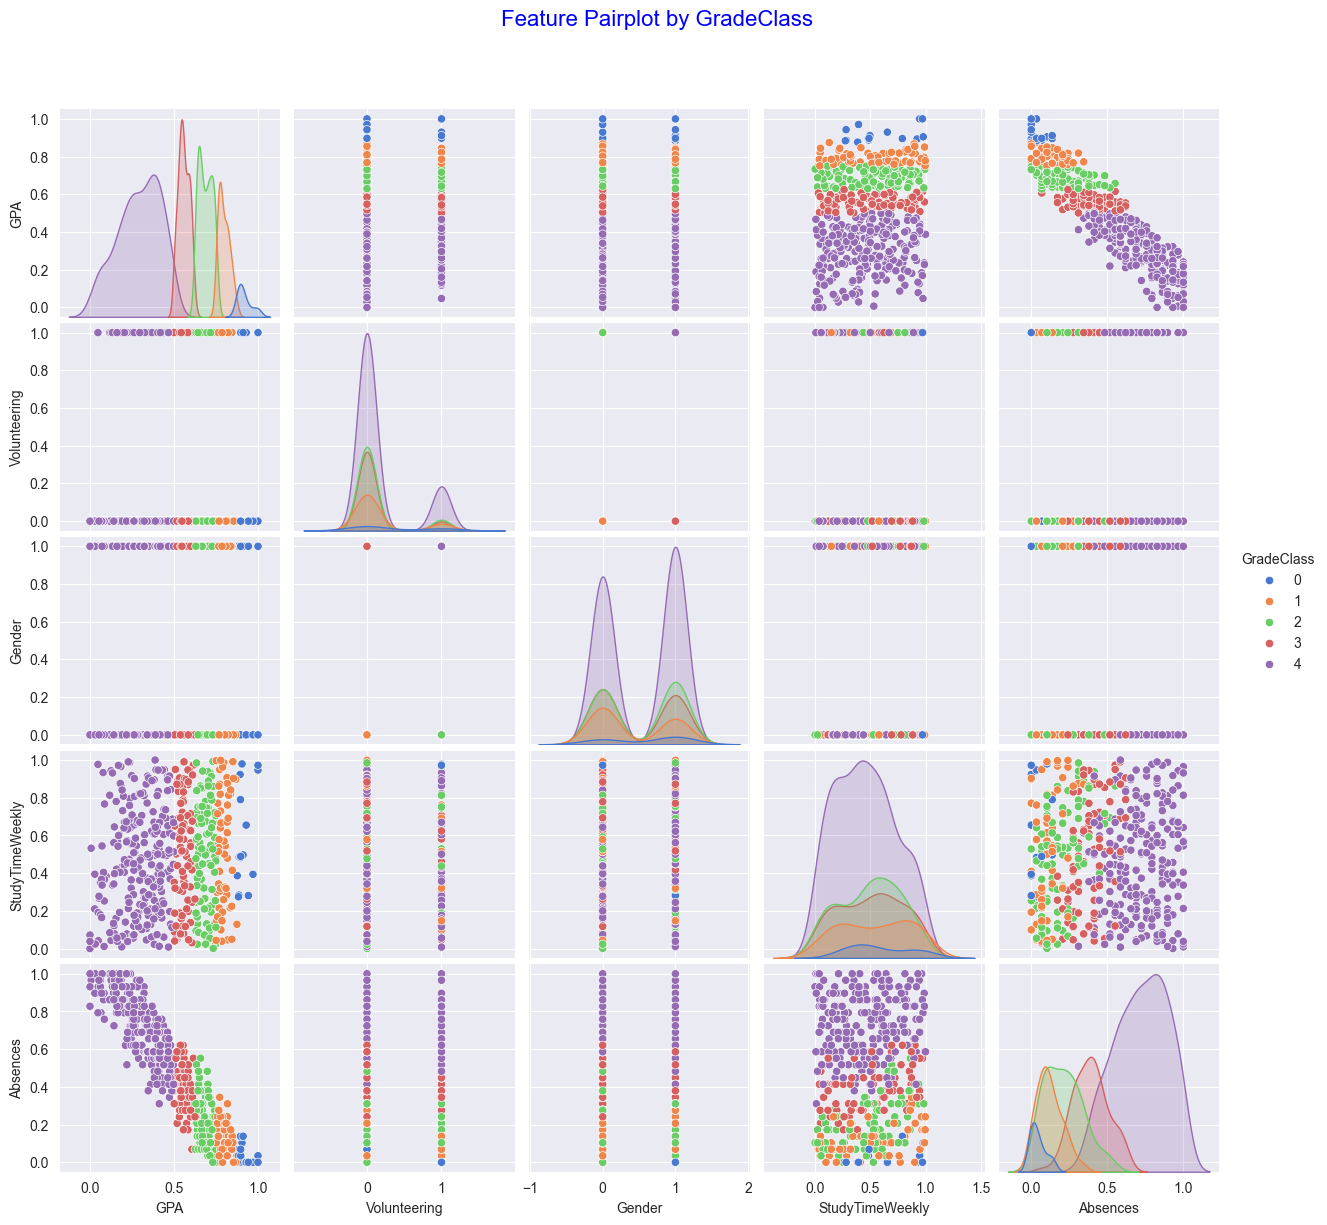

In [9]:
# Subset of selected features
pairplot_df = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences", "GradeClass"]].dropna()

# Limit to first 500 samples for clearer visualization
pairplot_df = pairplot_df.head(500)

# Create pairplot with scatter plots and class coloring
plot = sns.pairplot(
    pairplot_df,
    hue="GradeClass",
    palette="muted",
    height=2.5,
    kind="scatter"
)

# Set plot title
#
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Feature Pairplot by GradeClass", fontsize=16, color='b')


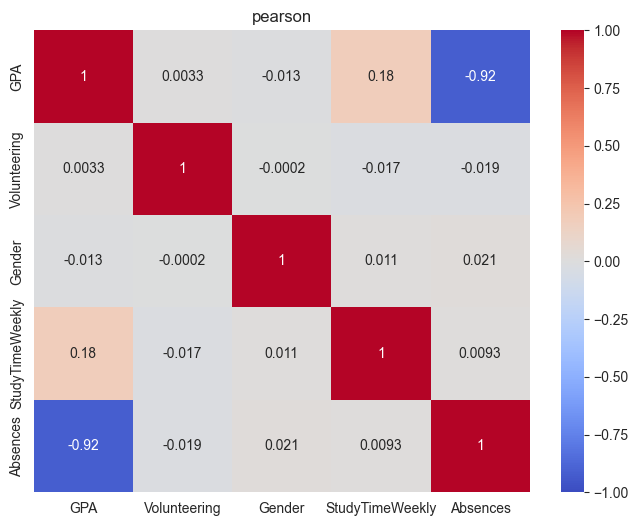

In [10]:
# Select numeric columns
numeric_features = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences"]]
# Compute correlation matrix
correlation_matrix = numeric_features.corr(method='pearson')
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("pearson")
plt.show()


# Part 2.

### K-MEANS algorithm.

k = 2 --> Silhouette Score = 0.3898
k = 3 --> Silhouette Score = 0.3606
k = 4 --> Silhouette Score = 0.3635
k = 5 --> Silhouette Score = 0.3538
k = 6 --> Silhouette Score = 0.3356


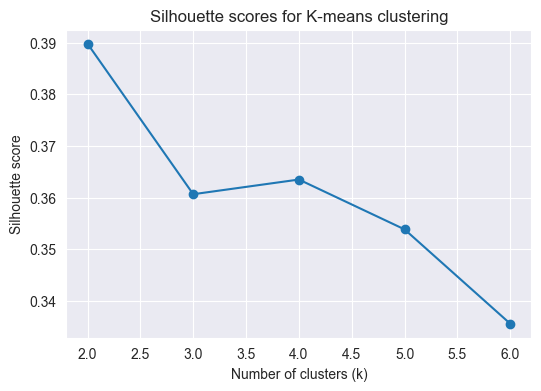

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
# Feature selection for clustering
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()
# List to store silhouette scores
silhouette_scores = []
# Loop through k values from 2 to 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(clustering_dataset)
    score = metrics.silhouette_score(clustering_dataset, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k} --> Silhouette Score = {score:.4f}")

# Plotting silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores for K-means clustering")
plt.grid(True)
plt.show()


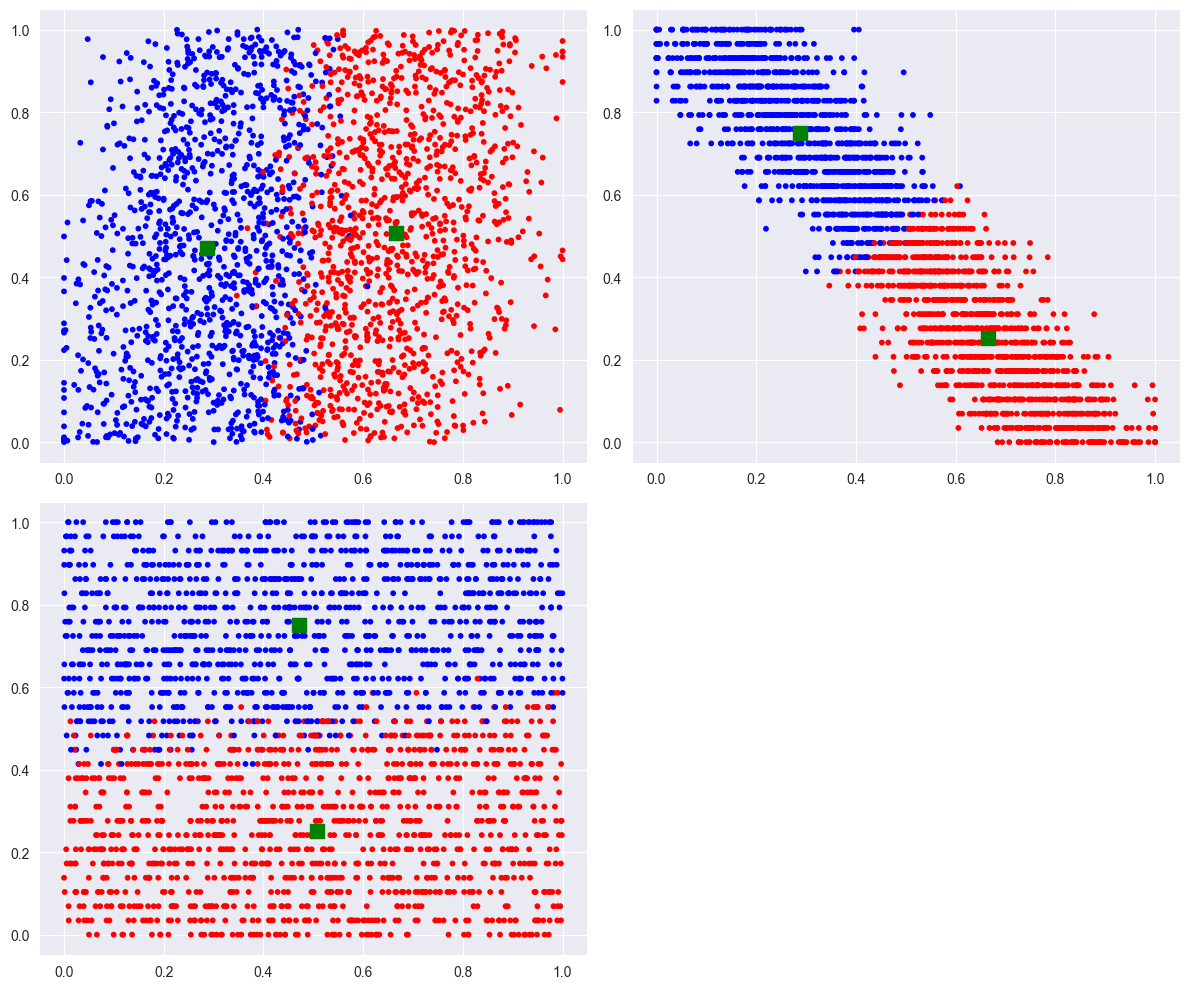

In [12]:

from sklearn.cluster import KMeans

# Use selected numeric features
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

# Fit KMeans model
kmeans_model = KMeans(n_clusters=2, init="k-means++", random_state=42).fit(clustering_dataset)

# Cluster centers
centroids = kmeans_model.cluster_centers_

# Predicted labels
y_pred = kmeans_model.predict(clustering_dataset)


# manually define cluster colors
colors = ['red', 'blue']
cluster_colors = [colors[label] for label in y_pred]

# Plotting in 2x2 layout
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(clustering_dataset["GPA"], clustering_dataset["StudyTimeWeekly"], s=10, c=cluster_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='g', marker='s')

plt.subplot(2, 2, 2)
plt.scatter(clustering_dataset["GPA"], clustering_dataset["Absences"], s=10,c=cluster_colors)
plt.scatter(centroids[:, 0], centroids[:, 2], s=100, c='g', marker='s')

plt.subplot(2, 2, 3)
plt.scatter(clustering_dataset["StudyTimeWeekly"], clustering_dataset["Absences"], s=10, c=cluster_colors)
plt.scatter(centroids[:, 1], centroids[:, 2], s=100, c='g', marker='s')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.cluster import AgglomerativeClustering

clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

clustering = AgglomerativeClustering().fit(clustering_dataset)



In [14]:


clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

model_2_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_2 = model_2_clusters.fit_predict(clustering_dataset)



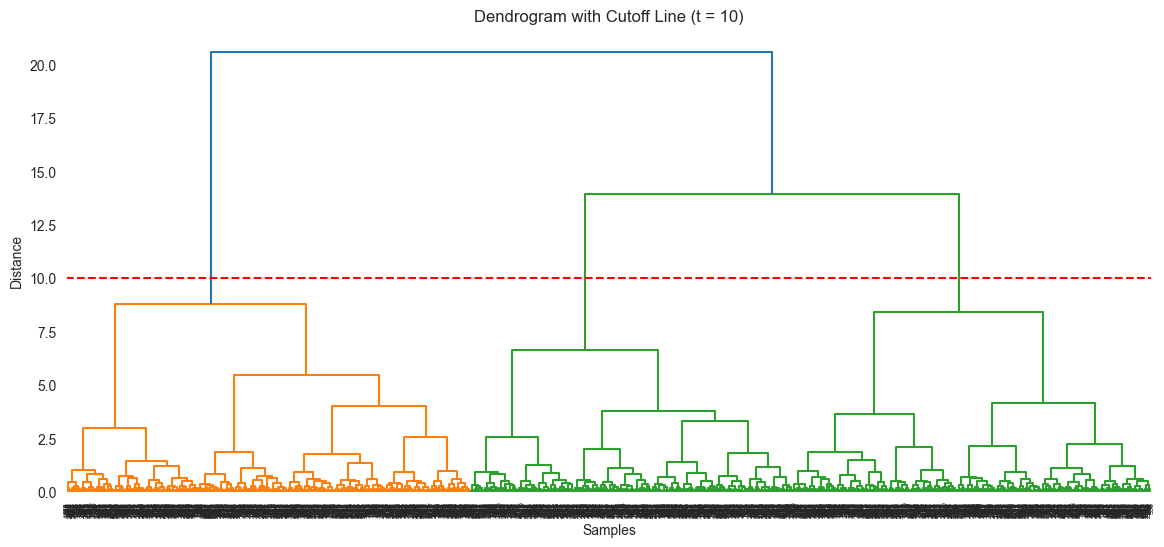

Cutoff t = 10 --> Number of clusters: 3


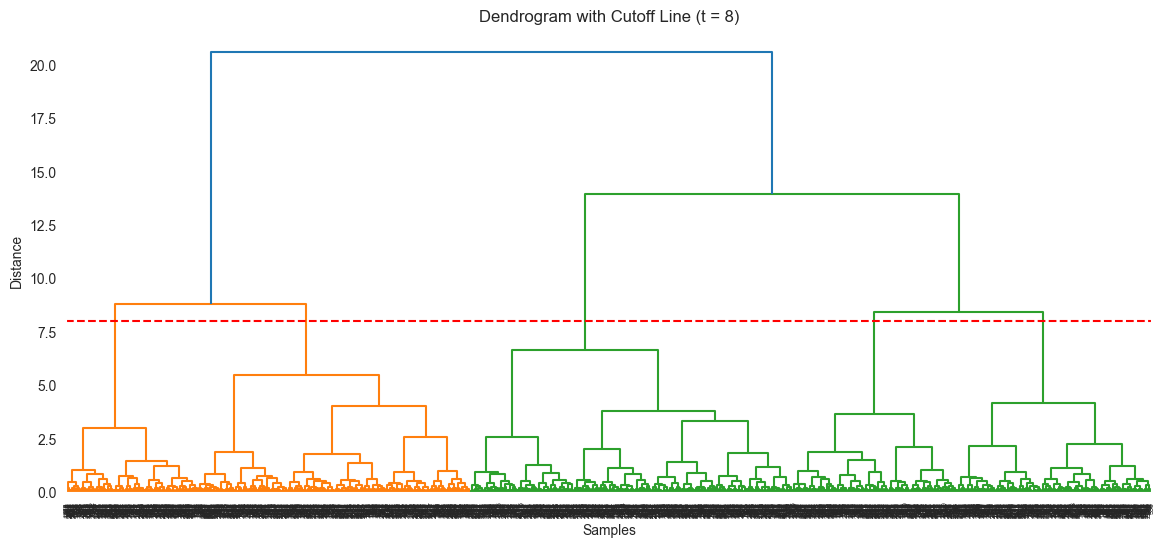

Cutoff t = 8 --> Number of clusters: 5


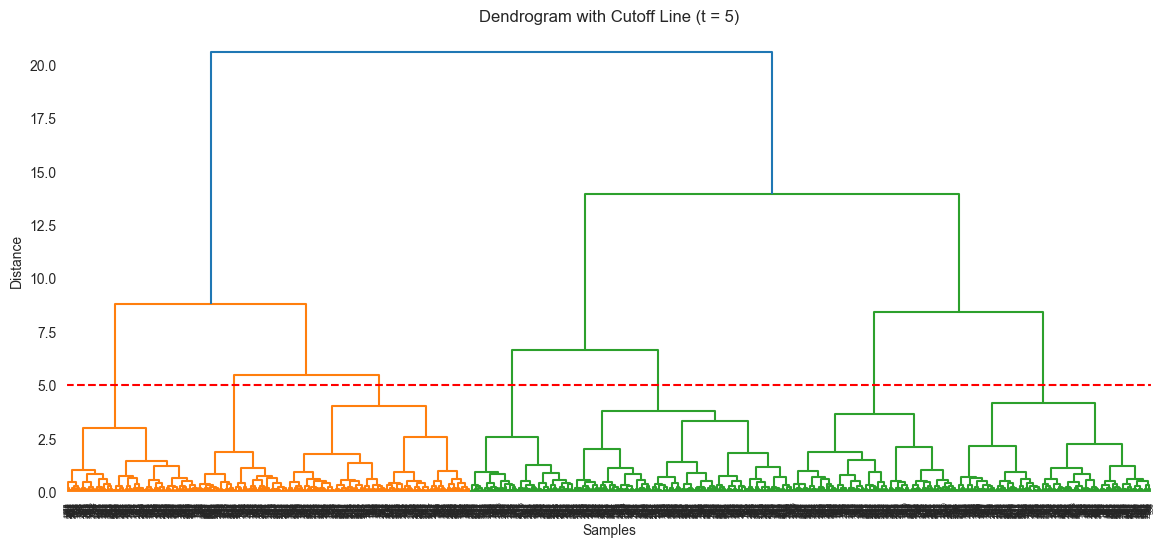

Cutoff t = 5 --> Number of clusters: 7


In [15]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster


# data selecting
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

#
linkage_matrix = shc.linkage(clustering_dataset, method='ward')

# Cutoff levels
cutoffs = [10, 8, 5]

#
for t in cutoffs:
    plt.figure(figsize=(14, 6))
    shc.dendrogram(linkage_matrix)
    plt.axhline(y=t, color='r', linestyle='--')
    plt.title(f"Dendrogram with Cutoff Line (t = {t})")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

    #
    labels = fcluster(linkage_matrix, t=t, criterion='distance')
    print(f"Cutoff t = {t} --> Number of clusters: {len(set(labels))}")


# Part 3.

### Artificial neural networks.

In [16]:
#importing a library for splitting the dataset into test and training dataset
from sklearn.model_selection import train_test_split
#saving the target values of the data objects, i.e. "grade classes", in a separate variable
targets = df['GradeClass']
#specifying the proportion of data objects that will form the training dataset (70%)
training_proportion = 0.7
#splitting the dataset into test and training sets using a random 70:30 split
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1.0 - training_proportion, random_state=42)

#### **Model 1** - 2 layers, 100 neurons in each.

In [18]:
#importing a library to work with artificial neural networks
from sklearn.neural_network import MLPClassifier
#building an artificial neural network model with 2 layers, each containing 100 neurons
#The following parameters are set: the maximum number of training iterations is 1000, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model = MLPClassifier(hidden_layer_sizes=(100,100),
                            max_iter=1000,
                             activation = 'logistic',
                             solver='sgd',
                             learning_rate_init = 0.1,
                             verbose = 1)
my_ann_model.fit(X_train, y_train)

Iteration 1, loss = 1.41162689
Iteration 2, loss = 1.34197839
Iteration 3, loss = 1.33313461
Iteration 4, loss = 1.32986531
Iteration 5, loss = 1.33087836
Iteration 6, loss = 1.33672720
Iteration 7, loss = 1.32994907
Iteration 8, loss = 1.32846254
Iteration 9, loss = 1.32455579
Iteration 10, loss = 1.32856675
Iteration 11, loss = 1.32058680
Iteration 12, loss = 1.31678794
Iteration 13, loss = 1.30786396
Iteration 14, loss = 1.30980964
Iteration 15, loss = 1.29693233
Iteration 16, loss = 1.27882343
Iteration 17, loss = 1.26120171
Iteration 18, loss = 1.22090216
Iteration 19, loss = 1.17778488
Iteration 20, loss = 1.11961833
Iteration 21, loss = 1.05246567
Iteration 22, loss = 1.00446765
Iteration 23, loss = 0.94989270
Iteration 24, loss = 0.93375809
Iteration 25, loss = 0.90805575
Iteration 26, loss = 0.89666975
Iteration 27, loss = 0.88919148
Iteration 28, loss = 0.89241556
Iteration 29, loss = 0.88590029
Iteration 30, loss = 0.87231952
Iteration 31, loss = 0.86992744
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.86      0.58      0.69        33
           1       0.80      0.88      0.84        80
           2       0.92      0.81      0.86       121
           3       0.88      0.88      0.88       127
           4       0.94      0.98      0.96       357

    accuracy                           0.91       718
   macro avg       0.88      0.83      0.85       718
weighted avg       0.91      0.91      0.90       718



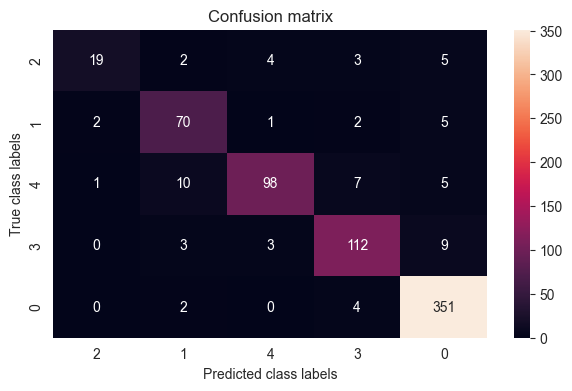

In [27]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#we use the trained model with a test set to obtain predictions
y_predictions = my_ann_model.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());

#### *Model 2* - 1 layer, 5 neurons

In [20]:
#building an artificial neural network model with 1 layer and 5 neurons in it
#The following parameters are set: the maximum number of training iterations is 50, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model_2 = MLPClassifier(hidden_layer_sizes=(5),
                               max_iter=50,
                               activation = 'logistic',
                               solver='sgd',
                               learning_rate_init = 0.2,
                               verbose = 0)
my_ann_model_2.fit(X_train, y_train)

C:\Users\Hp\PycharmProjects\machine-learning-assignment-python\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.58      0.60      0.59        80
           2       0.66      0.62      0.64       121
           3       0.65      0.67      0.66       127
           4       0.87      0.96      0.91       357

    accuracy                           0.77       718
   macro avg       0.55      0.57      0.56       718
weighted avg       0.73      0.77      0.74       718



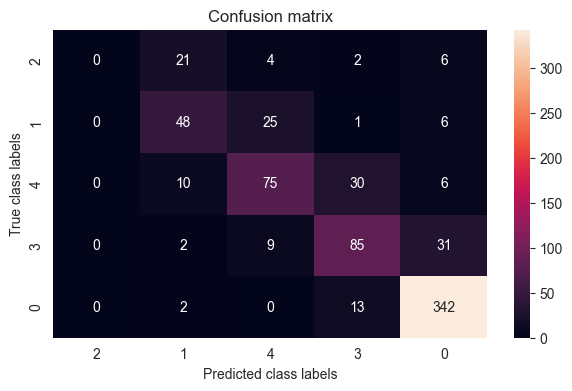

In [21]:
#we use the trained model with a test set to obtain predictions
y_predictions_2 = my_ann_model_2.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_2, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_2)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());

#### **Model 3** - 3 layers with decreasing neurons (50, 25, 10)

Iteration 1, loss = 1.48403484
Iteration 2, loss = 1.41914707
Iteration 3, loss = 1.37335889
Iteration 4, loss = 1.34114917
Iteration 5, loss = 1.30628447
Iteration 6, loss = 1.25990054
Iteration 7, loss = 1.21485874
Iteration 8, loss = 1.17033397
Iteration 9, loss = 1.12272569
Iteration 10, loss = 1.07564175
Iteration 11, loss = 1.02879651
Iteration 12, loss = 0.97998493
Iteration 13, loss = 0.94202291
Iteration 14, loss = 0.91255550
Iteration 15, loss = 0.88930911
Iteration 16, loss = 0.86955372
Iteration 17, loss = 0.85317840
Iteration 18, loss = 0.84026832
Iteration 19, loss = 0.82989626
Iteration 20, loss = 0.82214440
Iteration 21, loss = 0.81416744
Iteration 22, loss = 0.80746911
Iteration 23, loss = 0.80118929
Iteration 24, loss = 0.79668312
Iteration 25, loss = 0.79105162
Iteration 26, loss = 0.78458244
Iteration 27, loss = 0.77712027
Iteration 28, loss = 0.77214636
Iteration 29, loss = 0.76761513
Iteration 30, loss = 0.76030734
Iteration 31, loss = 0.75447006
Iteration 32, los

[Text(0, 0.5, '2'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '4'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '0')]

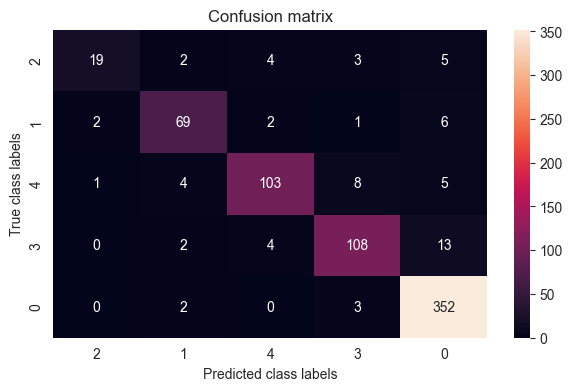

In [22]:

# The following parameters are set:
# - 3 hidden layers with 50, 25, and 10 neurons respectively
# - 500 maximum training iterations
# - ReLU activation function
# - Adam optimizer
# - Learning rate of 0.001
my_ann_model_3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    max_iter=500,
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    verbose=1
)

my_ann_model_3.fit(X_train, y_train)

# Using the trained model with the test set to obtain predictions
y_predictions_3 = my_ann_model_3.predict(X_test)

# Displaying metrics
print(classification_report(y_test, y_predictions_3, zero_division=0))

# Creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_3)

# Displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7, 4))
sns.heatmap(my_confusion_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted class labels')
ax.set_ylabel('True class labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(df['GradeClass'].unique())
ax.yaxis.set_ticklabels(df['GradeClass'].unique())

### kNN algoritms.

In [23]:
#importing a library to use the algorithm
from sklearn.neighbors import KNeighborsClassifier
#a model with 5 neighbours is created
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Feed the training dataset to the model
KNN_MODEL.fit(X_train, y_train)
#we use the trained model with a test set to obtain predictions
y_predictions_knn = KNN_MODEL.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.75      0.76      0.76        80
           2       0.78      0.78      0.78       121
           3       0.80      0.77      0.78       127
           4       0.92      0.97      0.94       357

    accuracy                           0.85       718
   macro avg       0.81      0.74      0.76       718
weighted avg       0.85      0.85      0.85       718



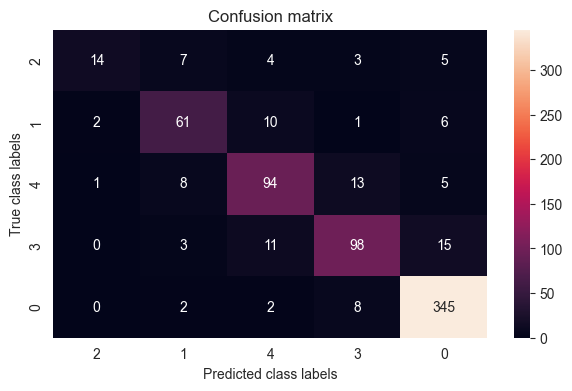

In [24]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix
#displaying metrics
print(classification_report(y_test,y_predictions_knn, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_knn)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());

### Logistic Regression Algorithm

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.59      0.46      0.52        80
           2       0.58      0.79      0.67       121
           3       0.66      0.39      0.49       127
           4       0.84      0.98      0.90       357

    accuracy                           0.74       718
   macro avg       0.53      0.52      0.52       718
weighted avg       0.70      0.74      0.71       718



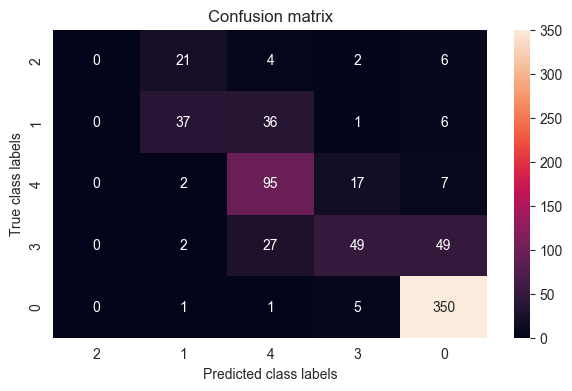

In [25]:
#importing a library for logistic regression
from sklearn.linear_model import LogisticRegression

#creating a logistic regression model without the deprecated parameter
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')
#fitting the model to the training dataset
logistic_model.fit(X_train, y_train)
#we use the trained model with a test set to obtain predictions
y_predictions_logistic = logistic_model.predict(X_test)
#displaying metrics
print(classification_report(y_test, y_predictions_logistic, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_logistic)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7, 4))
sns.heatmap(my_confusion_matrix, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());



### Information about test and training datasets

In [26]:
import pandas as pd

# Total number of objects
total_objects = len(df)
print(f"Total number of data objects: {total_objects}")

# Training dataset info
print(f"Number of data objects in the training dataset: {len(y_train)}")
print(f"% proportion of data objects in the training dataset: {len(y_train) / total_objects * 100:.2f}%")

# Per-class counts and percentages in training data
train_class_counts = y_train.value_counts().sort_index()
train_class_percentages = y_train.value_counts(normalize=True).sort_index() * 100

train_info = pd.DataFrame({
    'Class label': train_class_counts.index,
    'Number in training dataset': train_class_counts.values,
    '% in training dataset': train_class_percentages.values.round(2)
})
print("\nTraining dataset class distribution:")
print(train_info)

# Test dataset info
print(f"\nNumber of data objects in the test dataset: {len(y_test)}")
print(f"% proportion of data objects in the test dataset: {len(y_test) / total_objects * 100:.2f}%")

# Per-class counts and percentages in test data
test_class_counts = y_test.value_counts().sort_index()
test_class_percentages = y_test.value_counts(normalize=True).sort_index() * 100

test_info = pd.DataFrame({
    'Class label': test_class_counts.index,
    'Number in test dataset': test_class_counts.values,
    '% in test dataset': test_class_percentages.values.round(2)
})
print("\nTest dataset class distribution:")
print(test_info)


Total number of data objects: 2392
Number of data objects in the training dataset: 1674
% proportion of data objects in the training dataset: 69.98%

Training dataset class distribution:
   Class label  Number in training dataset  % in training dataset
0            0                          74                   4.42
1            1                         189                  11.29
2            2                         270                  16.13
3            3                         287                  17.14
4            4                         854                  51.02

Number of data objects in the test dataset: 718
% proportion of data objects in the test dataset: 30.02%

Test dataset class distribution:
   Class label  Number in test dataset  % in test dataset
0            0                      33               4.60
1            1                      80              11.14
2            2                     121              16.85
3            3                     127       

## Experiments with Logistic Regression and kNN

kNN Experiment 1 (k=3)
              precision    recall  f1-score   support

           0       0.67      0.42      0.52        33
           1       0.71      0.76      0.73        80
           2       0.77      0.76      0.77       121
           3       0.81      0.76      0.78       127
           4       0.91      0.96      0.94       357

    accuracy                           0.84       718
   macro avg       0.78      0.73      0.75       718
weighted avg       0.84      0.84      0.84       718



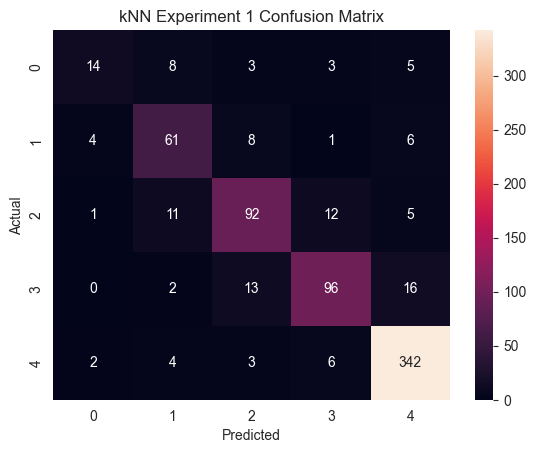

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
y_pred_knn1 = knn1.predict(X_test)

print("kNN Experiment 1 (k=3)")
print(classification_report(y_test, y_pred_knn1, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred_knn1), annot=True, fmt='g')
plt.title("kNN Experiment 1 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

kNN Experiment 2 (k=5, weighted)
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.76      0.75      0.75        80
           2       0.78      0.77      0.77       121
           3       0.78      0.75      0.76       127
           4       0.91      0.97      0.94       357

    accuracy                           0.85       718
   macro avg       0.82      0.74      0.77       718
weighted avg       0.84      0.85      0.84       718



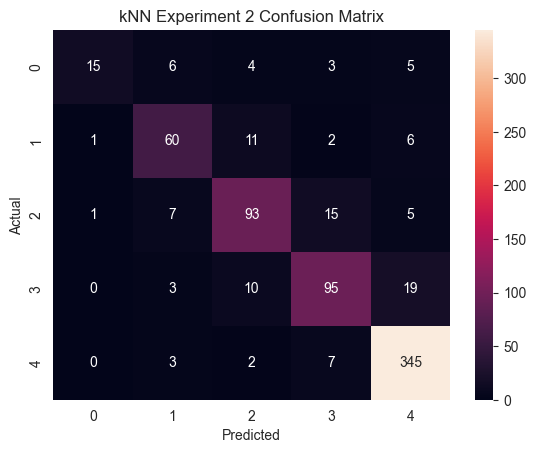

In [29]:
knn2 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn2.fit(X_train, y_train)
y_pred_knn2 = knn2.predict(X_test)

print("kNN Experiment 2 (k=5, weighted)")
print(classification_report(y_test, y_pred_knn2, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred_knn2), annot=True, fmt='g')
plt.title("kNN Experiment 2 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

kNN Experiment 3 (k=7, kd_tree)
              precision    recall  f1-score   support

           0       0.87      0.39      0.54        33
           1       0.73      0.76      0.74        80
           2       0.76      0.75      0.76       121
           3       0.79      0.76      0.77       127
           4       0.92      0.97      0.94       357

    accuracy                           0.85       718
   macro avg       0.81      0.73      0.75       718
weighted avg       0.84      0.85      0.84       718



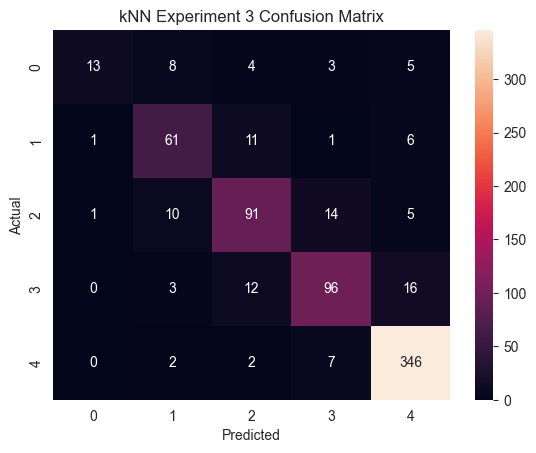

In [30]:
knn3 = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')
knn3.fit(X_train, y_train)
y_pred_knn3 = knn3.predict(X_test)

print("kNN Experiment 3 (k=7, kd_tree)")
print(classification_report(y_test, y_pred_knn3, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred_knn3), annot=True, fmt='g')
plt.title("kNN Experiment 3 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression Experiment 1 (lbfgs)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.59      0.46      0.52        80
           2       0.58      0.79      0.67       121
           3       0.66      0.39      0.49       127
           4       0.84      0.98      0.90       357

    accuracy                           0.74       718
   macro avg       0.53      0.52      0.52       718
weighted avg       0.70      0.74      0.71       718



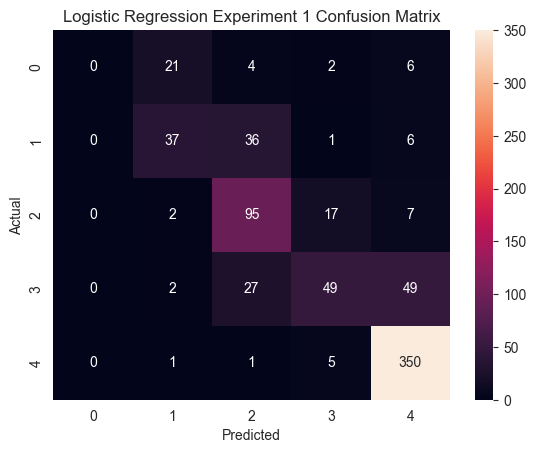

In [31]:
from sklearn.linear_model import LogisticRegression

log1 = LogisticRegression(max_iter=1000, solver='lbfgs')
log1.fit(X_train, y_train)
y_pred_log1 = log1.predict(X_test)

print("Logistic Regression Experiment 1 (lbfgs)")
print(classification_report(y_test, y_pred_log1, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred_log1), annot=True, fmt='g')
plt.title("Logistic Regression Experiment 1 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression Experiment 2 (liblinear)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.50      0.21      0.30        80
           2       0.47      0.80      0.60       121
           3       0.22      0.03      0.06       127
           4       0.77      0.99      0.87       357

    accuracy                           0.66       718
   macro avg       0.39      0.41      0.36       718
weighted avg       0.56      0.66      0.57       718



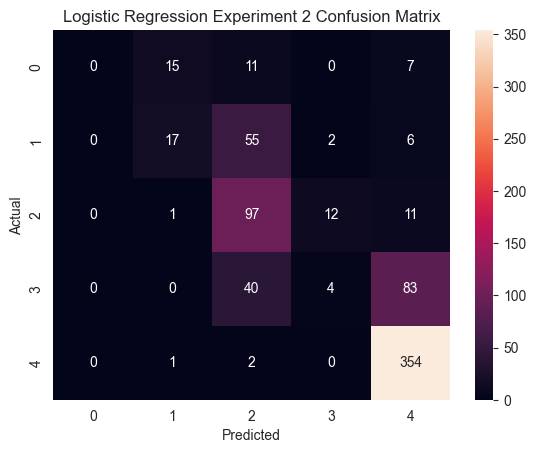

In [32]:
log2 = LogisticRegression(max_iter=1000, solver='liblinear')
log2.fit(X_train, y_train)
y_pred_log2 = log2.predict(X_test)

print("Logistic Regression Experiment 2 (liblinear)")
print(classification_report(y_test, y_pred_log2, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred_log2), annot=True, fmt='g')
plt.title("Logistic Regression Experiment 2 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression Experiment 3 (saga, C=0.5)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.56      0.35      0.43        80
           2       0.54      0.78      0.64       121
           3       0.56      0.24      0.34       127
           4       0.80      0.99      0.89       357

    accuracy                           0.70       718
   macro avg       0.49      0.47      0.46       718
weighted avg       0.65      0.70      0.66       718



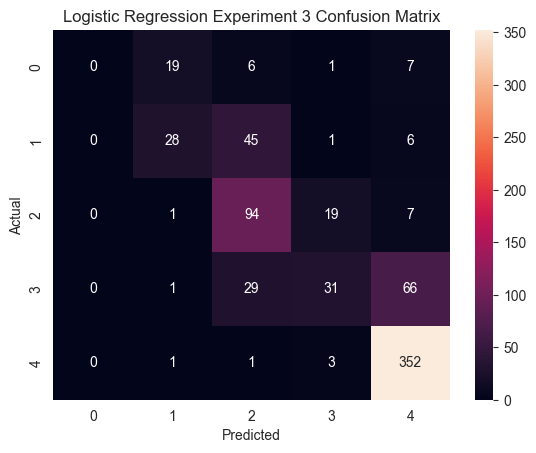

In [33]:
log3 = LogisticRegression(max_iter=1000, solver='saga', C=0.5)
log3.fit(X_train, y_train)
y_pred_log3 = log3.predict(X_test)

print("Logistic Regression Experiment 3 (saga, C=0.5)")
print(classification_report(y_test, y_pred_log3, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred_log3), annot=True, fmt='g')
plt.title("Logistic Regression Experiment 3 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Final Testing Results - kNN (Experiment 2)
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.76      0.75      0.75        80
           2       0.78      0.77      0.77       121
           3       0.78      0.75      0.76       127
           4       0.91      0.97      0.94       357

    accuracy                           0.85       718
   macro avg       0.82      0.74      0.77       718
weighted avg       0.84      0.85      0.84       718



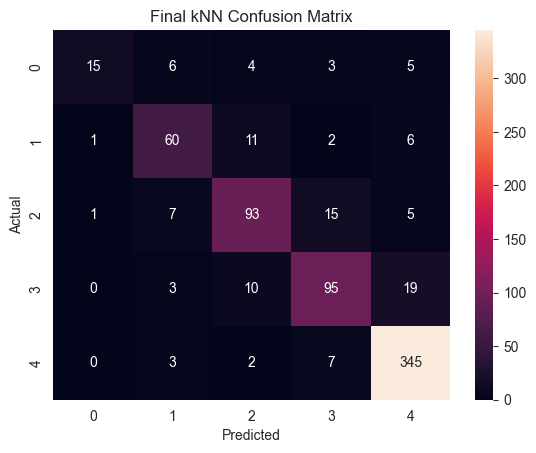

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the selected model
knn_final = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_final.fit(X_train, y_train)
y_pred_knn_final = knn_final.predict(X_test)

# Show performance metrics
print("✅ Final Testing Results - kNN (Experiment 2)")
print(classification_report(y_test, y_pred_knn_final, zero_division=0))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_final), annot=True, fmt='g')
plt.title("Final kNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Final Testing Results - Logistic Regression (Experiment 1)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.59      0.46      0.52        80
           2       0.58      0.79      0.67       121
           3       0.66      0.39      0.49       127
           4       0.84      0.98      0.90       357

    accuracy                           0.74       718
   macro avg       0.53      0.52      0.52       718
weighted avg       0.70      0.74      0.71       718



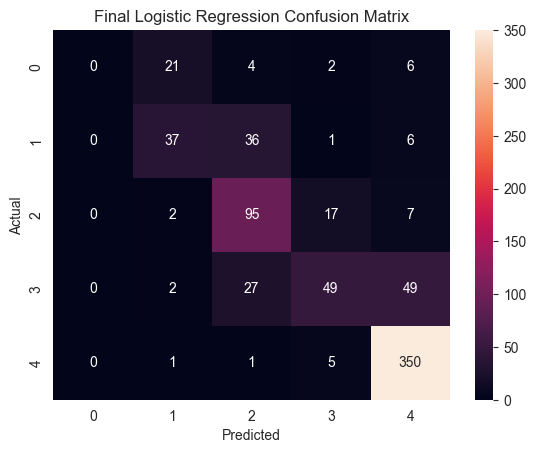

In [35]:
from sklearn.linear_model import LogisticRegression

# Train the selected model
log_final = LogisticRegression(max_iter=1000, solver='lbfgs')
log_final.fit(X_train, y_train)
y_pred_log_final = log_final.predict(X_test)

# Show performance metrics
print("✅ Final Testing Results - Logistic Regression (Experiment 1)")
print(classification_report(y_test, y_pred_log_final, zero_division=0))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_final), annot=True, fmt='g')
plt.title("Final Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()